#**Tugas Event #2 - Solving Real-World Problems with Data Science**

*   Nama : Muhammad Faisal Anshory
*   NIM : 15118015
*   Universitas : Institut Teknologi Bandung
*   Tanggal Mulai : 10 November 2020
*   Sumber Dataset : https://github.com/superpikar/indonesia-geojson https://www.kaggle.com/farizdarari/indonesiaprovincejmlpendudu

#0. Importing Library

In [1]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-huxi2z96
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-huxi2z96
  Created wheel for geopandas: filename=geopandas-0.8.0+59.gc823893-py2.py3-none-any.whl size=969977 sha256=22acf46ed831d1f5e38a63079c78bde3dae55cfe9e79f751037250b4aa20d4b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-ivc3ln2j/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#matplotlib inline
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

#1. Data Ingestion

In [3]:
!git clone --recursive https://github.com/faisalanshory/DSCDataScience.git

fatal: destination path 'DSCDataScience' already exists and is not an empty directory.


In [4]:
df_pd = gpd.read_file('/content/DSCDataScience/EksplorasiData_MuhammadFaisal/provinsi_penduduk.json')


In [5]:
df_pd.head()

,ID,kode,Propinsi,SUMBER,Jumlah Penduduk,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1416690,"MULTIPOLYGON (((137.91666 -1.49852, 137.89260 ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,4500212,"MULTIPOLYGON (((117.62720 -8.50640, 117.62630 ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1040164,"MULTIPOLYGON (((122.18814 1.04530, 122.18883 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,2232586,"MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,3457491,"POLYGON ((110.01183 -7.88690, 110.01330 -7.885..."


In [6]:
df_pd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               32 non-null     int64   
 1   kode             32 non-null     int64   
 2   Propinsi         32 non-null     object  
 3   SUMBER           32 non-null     object  
 4   Jumlah Penduduk  32 non-null     int64   
 5   geometry         32 non-null     geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 1.6+ KB


#2. Data Cleaning

Menghapus Kolom yang Tidak Akan Digunakan:
Pada data df_pd akan dihapus kolom ID, kode, dan SUMBER


In [7]:
df_pd = df_pd.drop(['ID', 'kode', 'SUMBER'], axis=1)
df_pd.head()

,Propinsi,Jumlah Penduduk,geometry
0,IRIAN JAYA TIMUR,1416690,"MULTIPOLYGON (((137.91666 -1.49852, 137.89260 ..."
1,NUSATENGGARA BARAT,4500212,"MULTIPOLYGON (((117.62720 -8.50640, 117.62630 ..."
2,GORONTALO,1040164,"MULTIPOLYGON (((122.18814 1.04530, 122.18883 1..."
3,SULAWESI TENGGARA,2232586,"MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ..."
4,DAERAH ISTIMEWA YOGYAKARTA,3457491,"POLYGON ((110.01183 -7.88690, 110.01330 -7.885..."


#3. Data Analysis

**1. Informasi Proyeksi Peta pada Kolom Geometri dan Bentuk Plot Data Geometri JSON**

In [8]:
df_pd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

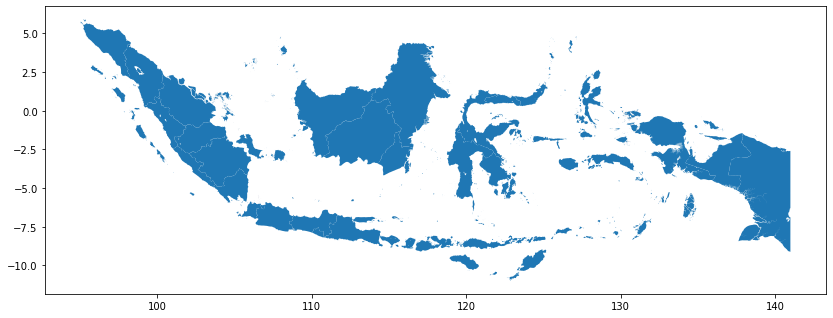

In [9]:
df_pd.plot(figsize=(14,12))

**2. Jumlah Provinsi pada data yang digunakan**

In [10]:
provinsi_pd = df_pd['Propinsi'].tolist()
print(provinsi_pd)
print('Total provinsi: ', len(provinsi_pd))

['IRIAN JAYA TIMUR', 'NUSATENGGARA BARAT', 'GORONTALO', 'SULAWESI TENGGARA', 'DAERAH ISTIMEWA YOGYAKARTA', 'JAWA TENGAH', 'PROBANTEN', 'JAWA TIMUR', 'MALUKU UTARA', 'MALUKU', 'KALIMANTAN SELATAN', 'KALIMANTAN BARAT', 'SULAWESI SELATAN', 'DKI JAKARTA', 'JAWA BARAT', 'IRIAN JAYA TENGAH', 'NUSA TENGGARA TIMUR', 'BALI', 'RIAU', 'SULAWESI TENGAH', 'KALIMANTAN TIMUR', 'SULAWESI UTARA', 'IRIAN JAYA BARAT', 'SUMATERA UTARA', 'BANGKA BELITUNG', 'SUMATERA BARAT', 'KALIMANTAN TENGAH', 'SUMATERA SELATAN', 'JAMBI', 'LAMPUNG', 'BENGKULU', 'DI. ACEH']
Total provinsi:  32


Karena data yang digunakan adalah data 2010 maka terdapat provinsi hasil pemekaran wilayah setelah tahun 2010 yang belum dimasukkan

**3. Informasi jumlah penduduk**

In [11]:
df_pd.describe().loc[['min','max']]

,Jumlah Penduduk
min,760422.0
max,43053732.0


In [12]:
print('Jumlah penduduk 2010:', df_pd['Jumlah Penduduk'].sum())

Jumlah penduduk 2010: 234803511


In [13]:
print('5 Provinsi dengan penduduk terbanyak', '\n', df_pd[['Propinsi', 'Jumlah Penduduk']].sort_values(by='Jumlah Penduduk', ascending=False).head())

5 Provinsi dengan penduduk terbanyak 
           Propinsi  Jumlah Penduduk
14      JAWA BARAT         43053732
7       JAWA TIMUR         37476757
5      JAWA TENGAH         32382657
23  SUMATERA UTARA         12982204
6        PROBANTEN         10632166


In [14]:
print('5 Provinsi dengan penduduk tersedikit', '\n', df_pd[['Propinsi', 'Jumlah Penduduk']].sort_values(by='Jumlah Penduduk', ascending=True).head())

5 Provinsi dengan penduduk tersedikit 
             Propinsi  Jumlah Penduduk
22  IRIAN JAYA BARAT           760422
8       MALUKU UTARA          1038087
2          GORONTALO          1040164
24   BANGKA BELITUNG          1223296
0   IRIAN JAYA TIMUR          1416690


# 4. Data Visualization

**1. Barplot Data Jumlah Penduduk Tiap Provinsi**

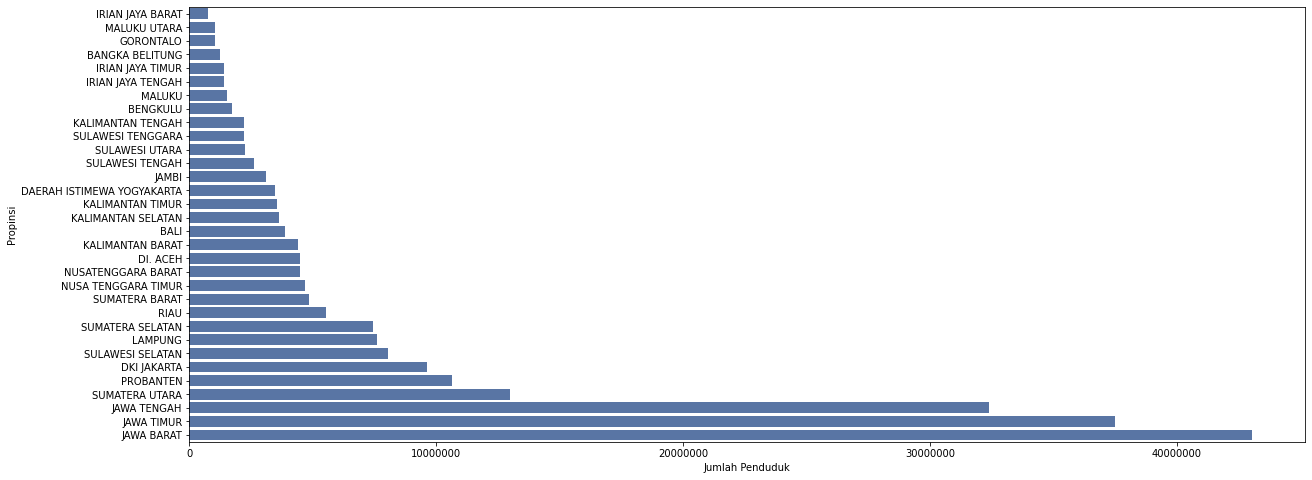

In [15]:
df_pd = df_pd.sort_values('Jumlah Penduduk')

f, ax = plt.subplots(figsize=(20, 8))

sns.set_color_codes()
sns.barplot(x="Jumlah Penduduk", y="Propinsi", data=df_pd[:],
           label="Jumlah Penduduk", color="b")
plt.ticklabel_format(style='plain', axis='x')

**2. Visualisasi Kepadatan Penduduk tiap Provinsi dengan Peta Koroplet**

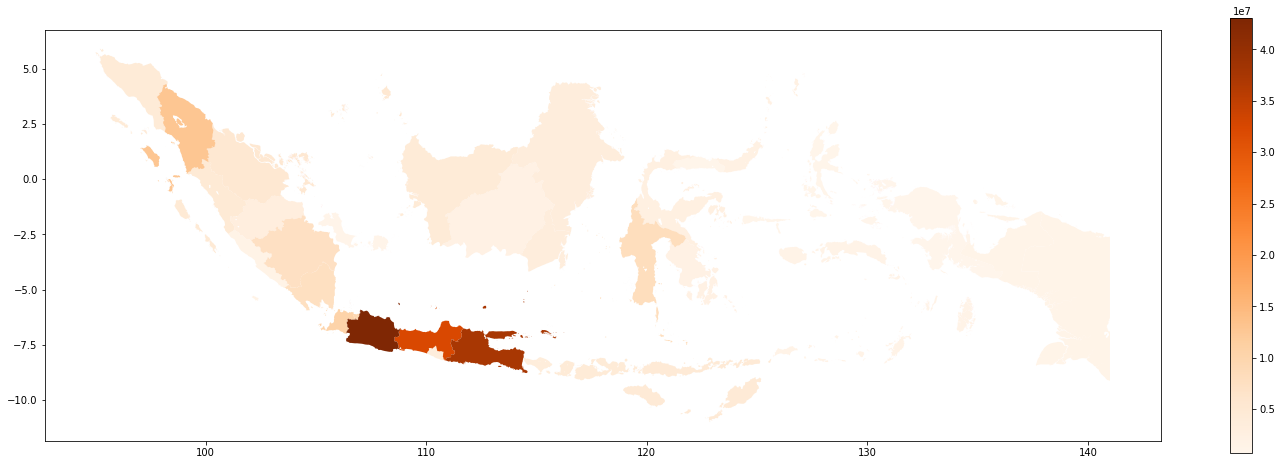

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(25, 8))
df_pd.plot(column='Jumlah Penduduk', ax=ax, legend=True, cmap='Oranges')

# 5. Conclusion

1. Pada tahun 2010, jumlah populasi terbanyak di Indonesia terdapat di Provinsi Jawa Barat dan jumlahnya mencapai 43.053.732
2. Jumlah populasi paling sedikit di Indonesia terdapat di Provinsi Irian Jaya Barat yang sekarang sudah berganti nama menjadi Papua Barat dan jumlahnya hanya mencapai 760.422
3. Jumlah penduduk total pada tahun 2010 adalah 234.803.511
4. Dari data visualisasi dengan menggunakan peta koroplet pulau yang paling padat adalah Pulau Jawa yang kemudian diikuti Pulau Sumatera dan Pulau Sulawesi